In [1]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path
from CFDmodule import *
from readStep import *
from PIL import Image  
%matplotlib inline

In [2]:
#specify inout parameters here
gamma=5.0/3.0
g=1.0
Lz=4
waveLen = 1
Ly = waveLen
mu =1.13137E-4
rho_h = 2
rho_l = 1
CFDmethod = False
#####input done

In [3]:
###calculate some parameters
dz=dy=dx=Lz/nz

if nx == 1:
    dx=1.0
    
horizon_lim = (0, Ly-dy)
vert_lim = (0, Lz-dz)
extent=horizon_lim+vert_lim

FieldPoint = h5file.get('Fields').values()
totalsteps, specout = get_LatestTime(FieldPoint)

step = []
for i in range(totalsteps/specout):
    step.append(str((i+1)*specout).zfill(6))
    
istep = str(totalsteps).zfill(6)
istep

'004000'

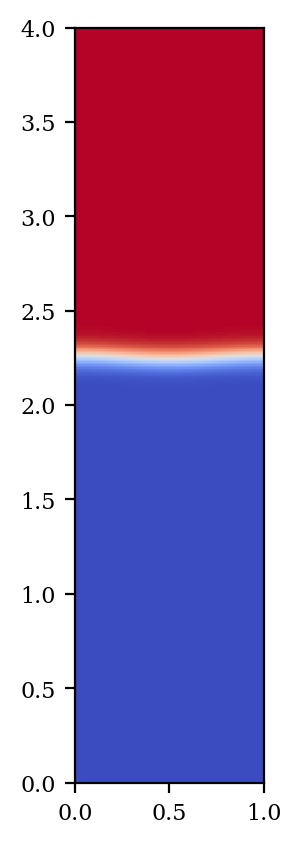

In [4]:
mylist = ['Fields/','Prho','/',istep]
filepath = delimiter.join(mylist)
databk = h5file.get(filepath)
rho = np.array(databk)
rho = np.transpose(rho)
rho = np.transpose(np.reshape(rho, (ny,nz)))

fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
plt.rc('font', family='serif', size=8)
plt.imshow(rho, origin='none', extent=horizon_lim+vert_lim, aspect=1,
           cmap='coolwarm',vmin=rho_l,vmax=rho_h)


In [5]:
##initil function for bub velocity
if CFDmethod == True:
    CFD_x = Create_matrix_fd2(nx) / dx
    CFD_y = Create_matrix_fd2(ny) / dy
    CFD_z = Create_matrix_fd2(nz) / dz

bub_loc_all = np.zeros(len(step))
bub_loc_all_ori = np.zeros(len(step))
sp_loc_all = np.zeros(len(step))
bub_velo_all = np.zeros(len(step))
bub_velo_all_aver = np.zeros(len(step))
sp_velo_all = np.zeros(len(step))
bub_velo_all_ori = np.zeros(len(step))

seq = 0

for istep in step:
    
    print "doing", float(istep)/totalsteps*100, "%"
    

    mylist = ['Fields/', 'Prho', '/', istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    np_data = np.array(databk)
    if nx == 1:
        m1 = (np_data[:, ny/2-1, 0] + np_data[:, ny/2, 0] )/2
    else:
        m1 = (np_data[:, ny/2-1, nx/2-1] + np_data[:, ny/2, nx/2] 
      + np_data[:, ny/2-1, nx/2] + np_data[:, ny/2, nx/2-1])/4.0
    m2 = np_data[:, 0, 0]
    m1_filter=m1.copy();    
    m2_filter=m2.copy();    
    for jstep in range(2,nz-3):
        m1_filter[jstep]=(m1[jstep-2]+m1[jstep-1]+m1[jstep]+m1[jstep+1]+m1[jstep+2])/5;
        m2_filter[jstep]=(m2[jstep-2]+m2[jstep-1]+m2[jstep]+m2[jstep+1]+m2[jstep+2])/5;


    m1_grad = high_order_gradient(m1_filter,dx,6)
    m2_grad = high_order_gradient(m2_filter,dx,6)


    sp_loc = np.argmax(m1_grad)
    bub_loc = np.argmax(m2_grad)

    sp_loc_all[seq] = sp_loc
    bub_loc_all[seq] = bub_loc

    mylist = ['Fields/', 'PVz', '/', istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    np_data = np.array(databk)

    #consider 2D/3D case
    if nx == 1:
        m1 = (np_data[:, ny/2-1, 0] + np_data[:, ny/2, 0] )/2
    else:
        m1 = (np_data[:, ny/2-1, nx/2-1] + np_data[:, ny/2, nx/2] 
      + np_data[:, ny/2-1, nx/2] + np_data[:, ny/2, nx/2-1])/4.0
    m2 = np_data[:, 0, 0]
    sp_velo = m1[sp_loc]
    bub_velo = m2[bub_loc]
    bub_velo_all[seq] = bub_velo
    sp_velo_all[seq] = sp_velo

    seq += 1


doing 1.0 %
doing 2.0 %
doing 3.0 %
doing 4.0 %
doing 5.0 %
doing 6.0 %
doing 7.0 %
doing 8.0 %
doing 9.0 %
doing 10.0 %
doing 11.0 %
doing 12.0 %
doing 13.0 %
doing 14.0 %
doing 15.0 %
doing 16.0 %
doing 17.0 %
doing 18.0 %
doing 19.0 %
doing 20.0 %
doing 21.0 %
doing 22.0 %
doing 23.0 %
doing 24.0 %
doing 25.0 %
doing 26.0 %
doing 27.0 %
doing 28.0 %
doing 29.0 %
doing 30.0 %
doing 31.0 %
doing 32.0 %
doing 33.0 %
doing 34.0 %
doing 35.0 %
doing 36.0 %
doing 37.0 %
doing 38.0 %
doing 39.0 %
doing 40.0 %
doing 41.0 %
doing 42.0 %
doing 43.0 %
doing 44.0 %
doing 45.0 %
doing 46.0 %
doing 47.0 %
doing 48.0 %
doing 49.0 %
doing 50.0 %
doing 51.0 %
doing 52.0 %
doing 53.0 %
doing 54.0 %
doing 55.0 %
doing 56.0 %
doing 57.0 %
doing 58.0 %
doing 59.0 %
doing 60.0 %
doing 61.0 %
doing 62.0 %
doing 63.0 %
doing 64.0 %
doing 65.0 %
doing 66.0 %
doing 67.0 %
doing 68.0 %
doing 69.0 %
doing 70.0 %
doing 71.0 %
doing 72.0 %
doing 73.0 %
doing 74.0 %
doing 75.0 %
doing 76.0 %
doing 77.0 %
doing 78

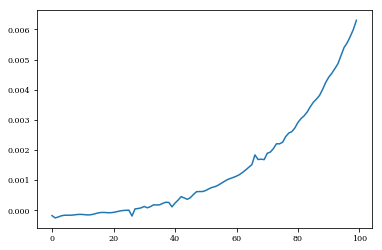

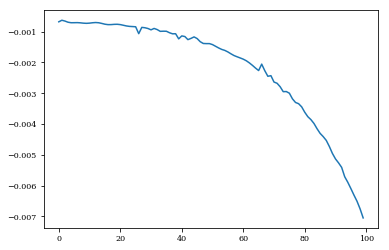

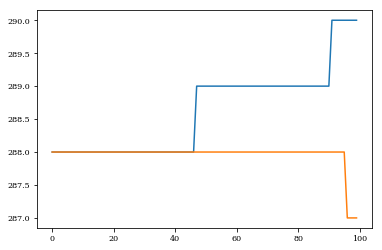

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(bub_velo_all)
plt.show()
plt.savefig('bubvel.eps', format='eps', dpi=300)
plt.clf()

plt.plot(sp_velo_all)
plt.show()
plt.savefig('spkvel.eps', format='eps', dpi=300)
plt.clf()

plt.plot(bub_loc_all)
plt.plot(sp_loc_all)
plt.savefig('loc.eps', format='eps', dpi=300)
plt.show()
plt.clf()

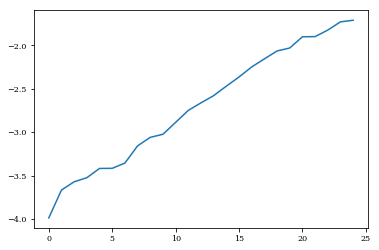

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(np.log(bub_velo_all))
plt.show()
plt.clf()

In [12]:
a = 0.33333
g = 1
k = 2*np.pi/waveLen
time = 5.02
Bcode = 0.2
B = Bcode*np.sqrt(4*np.pi)

In [13]:
n = np.sqrt(a*g*k - B*B*k*k/(rho_h+rho_l)/(2*np.pi))
lsa = np.multiply(n,np.linspace(0,time,len(step)))

/gpfs/fs1/sfw2/anaconda/5.3.0b/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log


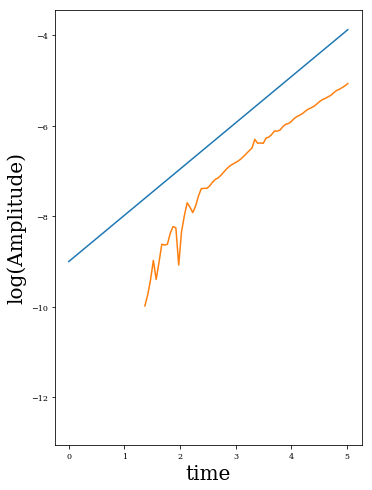

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(5.5,8))
plt.plot(np.linspace(0,time,len(step)),lsa-9)
#plt.xlim(0,5)
#plt.ylim(-10,0)
plt.xlabel('time', fontsize=20)
plt.ylabel('log(Amplitude)',fontsize=20)
plt.plot(np.linspace(0,time,len(step)),np.log(bub_velo_all))
plt.figsize=(2,1)
plt.show()
plt.clf()